In [150]:
import pandas as pd
import seaborn as sns
import numpy as np
import plotly.graph_objects as go
import matplotlib.pyplot as plt
import plotly.io as pio
import os
import PIL
import io
if not os.path.exists("images"):
    os.mkdir("images")

# Import and merge datasets

In [151]:
df = pd.read_csv('data/Olympics_Games.csv')
medal = pd.read_csv('data/Olympic_Games_Medal_Tally.csv')
country = pd.read_excel('data/olympic_city_country.xlsx')
place = pd.read_csv('data/nocRegions.csv')

newdf1 = df[['year','city']].merge(medal[['year','country','total']], how='right')
list_africa=pd.read_excel('data/list-african-countries-dependent-territory-286j.xls')

gpd = pd.read_csv('data/API_NY.GDP.MKTP.CD_DS2_en_csv_v2_4701247.csv',skiprows=[0,1,2])
gpd=gpd.fillna(0)
newdf1.head(4)

,year,city,country,total
0,1896,Athina,United States,20
1,1896,Athina,Greece,47
2,1896,Athina,Germany,13
3,1896,Athina,France,11


# data pre-processing 

In [152]:
newdf1['country'][newdf1['country']=='Great Britain']='United Kingdom'
newdf1['country'][newdf1['country']=='West Germany']='Germany'
newdf1.isnull().sum()
list_africa=list_africa.dropna()

<ipython-input-152-1f05fb13a1bd>:1: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

<ipython-input-152-1f05fb13a1bd>:2: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



In [153]:
newdf1.head(4)

,year,city,country,total
0,1896,Athina,United States,20
1,1896,Athina,Greece,47
2,1896,Athina,Germany,13
3,1896,Athina,France,11


In [154]:
pd.unique(newdf1['year'])

array([1896, 1900, 1904, 1908, 1912, 1920, 1924, 1928, 1932, 1936, 1948,
       1952, 1956, 1960, 1964, 1968, 1972, 1976, 1980, 1984, 1988, 1992,
       1996, 2000, 2004, 2008, 2012, 2016, 2020, 1994, 1998, 2002, 2006,
       2010, 2014, 2018, 2022])

In [155]:
country = country.rename(columns={'City': 'city'})
newdf1 = newdf1.rename(columns={'total': 'Medal number', "Country": 'Host country'})
newdf = newdf1.merge(country, how='right').dropna()
newdf = newdf.rename(columns={"Country": 'Host country'})
newdf.head(4)

,year,city,country,Medal number,Host country
1,1900.0,Paris,France,111.0,France
2,1900.0,Paris,United States,48.0,France
3,1900.0,Paris,United Kingdom,38.0,France
4,1900.0,Paris,Belgium,18.0,France


# number of medal won by each country

In [156]:
tmp = newdf.groupby(['country'])['Medal number'].sum()
df4 = pd.DataFrame(data={'Medal': tmp.values}, index=tmp.index).reset_index()
df4 =df4.sort_values(by=['Medal'],ascending=False)
df4.head(4)

,country,Medal
143,United States,5707.0
119,Soviet Union,2825.0
46,Germany,2356.0
141,United Kingdom,2010.0


## a) Number of  olympic games host by country

In [157]:
tmp = newdf.drop_duplicates(subset=['year'])
tmp = tmp.groupby(['Host country'])['Host country'].value_counts()
l= [tmp.index[i][0] for i in range(len(tmp))]
t = {"host country": l,'Number games hosted':tmp.values }
seasoncount = pd.DataFrame(t)
seasoncount.head()

,host country,Number games hosted
0,Australia,1
1,Austria,2
2,Belgium,1
3,Brazil,1
4,Canada,2


## b) Top 12 world countries that have won more medial and hosted at least one Olympic game.

In [158]:

pg =df4[df4['country'].isin(list(seasoncount['host country']))]
pg= pg.rename(columns={"country": 'host country'})
l = pg.merge(seasoncount, how='right').dropna()
GPD=gpd[gpd['Country Name'].isin(list(seasoncount['host country']))]
GPD = GPD.sort_values(by=['2021'],ascending=False)
pfd = pd.DataFrame({'host country': GPD['Country Name'], 'GDP rank':[i for i in range(1,len(GPD['Country Name'])+1)]})

In [159]:
ll = l.merge(pfd, how='right').dropna()
ll['Number games hosted']=ll['Number games hosted'].values.astype(int)
ll =ll.sort_values(by=['Medal'],ascending=False)
ll = ll.head(12)
ll =ll.sort_values(by=['Number games hosted'],ascending=False)

# ll['Number games hosted']=ll['Number games hosted'].values.astype(str)


fig = px.bar(ll, x="Medal", y="host country", pattern_shape="Number games hosted",text='Medal',color="GDP rank",
             title="Top 12 world countries that have won more medal and hosted at least one Olympic game between 1986-2022.",
labels={ # replaces default labels by column name
                "Number games hosted": "Number of Olympic games hosted",
                'GDP rank': "World GDP rank"
            })
fig.update_layout(yaxis=dict(autorange="reversed"), legend_title_font_color="black",
                  font_color="black",legend = dict(font = dict(size = 12)),
    title_font_color="black")
fig.update_layout(legend=dict(
    yanchor="bottom",
    y=0.03,
    xanchor="right",
    x=.97
))
fig.update_layout({
'plot_bgcolor': 'rgba(0, 0, 0, 0)',
'paper_bgcolor': 'rgba(0, 0, 0, 0)',
})
fig.update_yaxes(title_text='')
fig.update_traces(textposition='outside')
fig.show()



In [160]:
ll = l.merge(pfd, how='right').dropna()
ll['Number games hosted']=ll['Number games hosted'].values.astype(int)
ll =ll.sort_values(by=['Medal'],ascending=False)
ll = ll.head(12)
ll =ll.sort_values(by=['Medal'],ascending=False)
ll["GDP rank"] = ll["GDP rank"].astype(str)
ll["Number games hosted"] = ll["Number games hosted"].astype(str)
# ll['Number games hosted']=ll['Number games hosted'].values.astype(str)


fig = px.bar(ll, x="Medal", y="host country",text='Medal',color="Number games hosted",
             title="Top 12 world countries that have won more medal and hosted at least one Olympic game between 1986-2022.",
labels={ # replaces default labels by column name
                "Number games hosted": "Number of Olympic games hosted",
                'GDP rank': "World GDP rank"
            })
fig.update_layout(yaxis=dict(autorange="reversed"), legend_title_font_color="black",
                  font_color="black",legend = dict(font = dict(size = 12)),
    title_font_color="black")
fig.update_layout(legend=dict(
    yanchor="bottom",
    y=0.03,
    xanchor="right",
    x=.97
))
fig.update_layout({
'plot_bgcolor': 'rgba(0, 0, 0, 0)',
'paper_bgcolor': 'rgba(0, 0, 0, 0)',
})
fig.update_yaxes(title_text='')
fig.update_traces(textposition='outside')
fig.show()



In [161]:
ll.to_csv('data/top_12.csv')


#  Does hosting the Olympic games and the country's economy affect its performance?

# coustomized plot:

In [162]:
custom_template = {
    "layout": go.Layout(
        font={
            "family": "Nunito",
            "size": 12,
            "color": "black",
        },
        title={
            "font": {
                "family": "Lato",
                "size": 18,
                "color": "#1f1f1f",
            },
        },
        plot_bgcolor="#ffffff",
        paper_bgcolor="#ffffff",
        colorway=px.colors.qualitative.G10,
    )
}

In [163]:
def format_title(title, subtitle=None, subtitle_font_size=12):
    title = f'<b>{title}</b>'
    if not subtitle:
        return title
    subtitle = f'<span style="font-size: {subtitle_font_size}px;">{subtitle}</span>'
    return f'{title}<br>{subtitle}'

In [170]:

import pycountry

ll = l.merge(pfd, how='right').dropna()
ll['Number games hosted']=ll['Number games hosted'].values.astype(int)
ll =ll.sort_values(by=['Medal'],ascending=False)
ll = ll.head(9)

iso3_to_iso2 = {c.alpha_3: c.alpha_2 for c in pycountry.countries}

df = px.data.gapminder().query("year==2007")
df["iso_alpha2"] = df["iso_alpha"].map(iso3_to_iso2)
ll = ll.rename(columns={"host country": 'country'})
df=ll.merge(df,how='right').dropna()

fig = px.scatter(
    df,y="Medal", x="Number games hosted",text='country',
    hover_name="country",labels={"sex": "GDP rank"},template=custom_template,
    hover_data=["Medal", "Number games hosted", "GDP rank"]
)
fig.update_traces(marker_color="rgba(0,0,0,0)")

minDim = df[["Medal", "Number games hosted"]].max().idxmax()
maxi = df[minDim].max()
for i, row in df.iterrows():
    country_iso = row["iso_alpha2"]
    fig.add_layout_image(
        dict(
            source=f"https://raw.githubusercontent.com/matahombres/CSS-Country-Flags-Rounded/master/flags/{country_iso}.png",
            xref="x",
            yref="y",
            xanchor="center",
            yanchor="middle",
            y=row["Medal"],
            x=row["Number games hosted"],
#             sizex=np.sqrt(row["GDP rank"] / df["GDP rank"].max()) * maxi * 0.02 + maxi * 0.04,
#             sizey=np.sqrt(row["GDP rank"] / df["GDP rank"].max()) * maxi * 0.02 + maxi * 0.1,
            sizex = 300,
            sizey=300,
            sizing="contain",
            opacity=1,
            layer="above"
        )
    )
fig.update_traces(textposition='top right')
fig.update_yaxes(title_text='')
fig.update_xaxes(title_text='Number of games hosted')


fig.update_layout( title=format_title("Hosting the Olympics Games: A Weak but Positive Influence on Medal Performance", 
                                      "Data collected between 186-2021.")
)
fig.update_layout( xaxis_range=[0, 8])
fig.update_layout(
    annotations=[
        dict(
            text="Data source: https://www.kaggle.com/datasets/josephcheng123456/olympic-historical-dataset-from-olympediaorg?select=Olympic_Athlete_Bio.csv",
            xref="paper",
            yref="paper",
            x=0,
            y=-.16,
            showarrow=False
        ),
        dict(
            text="Number of medals won",
            xref="paper",
            yref="paper",
            x=-.08,
            y=1.05,
            showarrow=False
        )
    ]
)

fig.update_yaxes(title_text='')
fig.show()
pio.write_image(fig, 'Host.png', width=1000, height=600, scale=5)

The titles effectively conveys that there is a small positive correlation between the number of Olympic Games hosted and the number of medals won. They also allude to the fact that this correlation is not particularly strong, indicating that other factors likely also play a role in determining medal success at the Olympics.

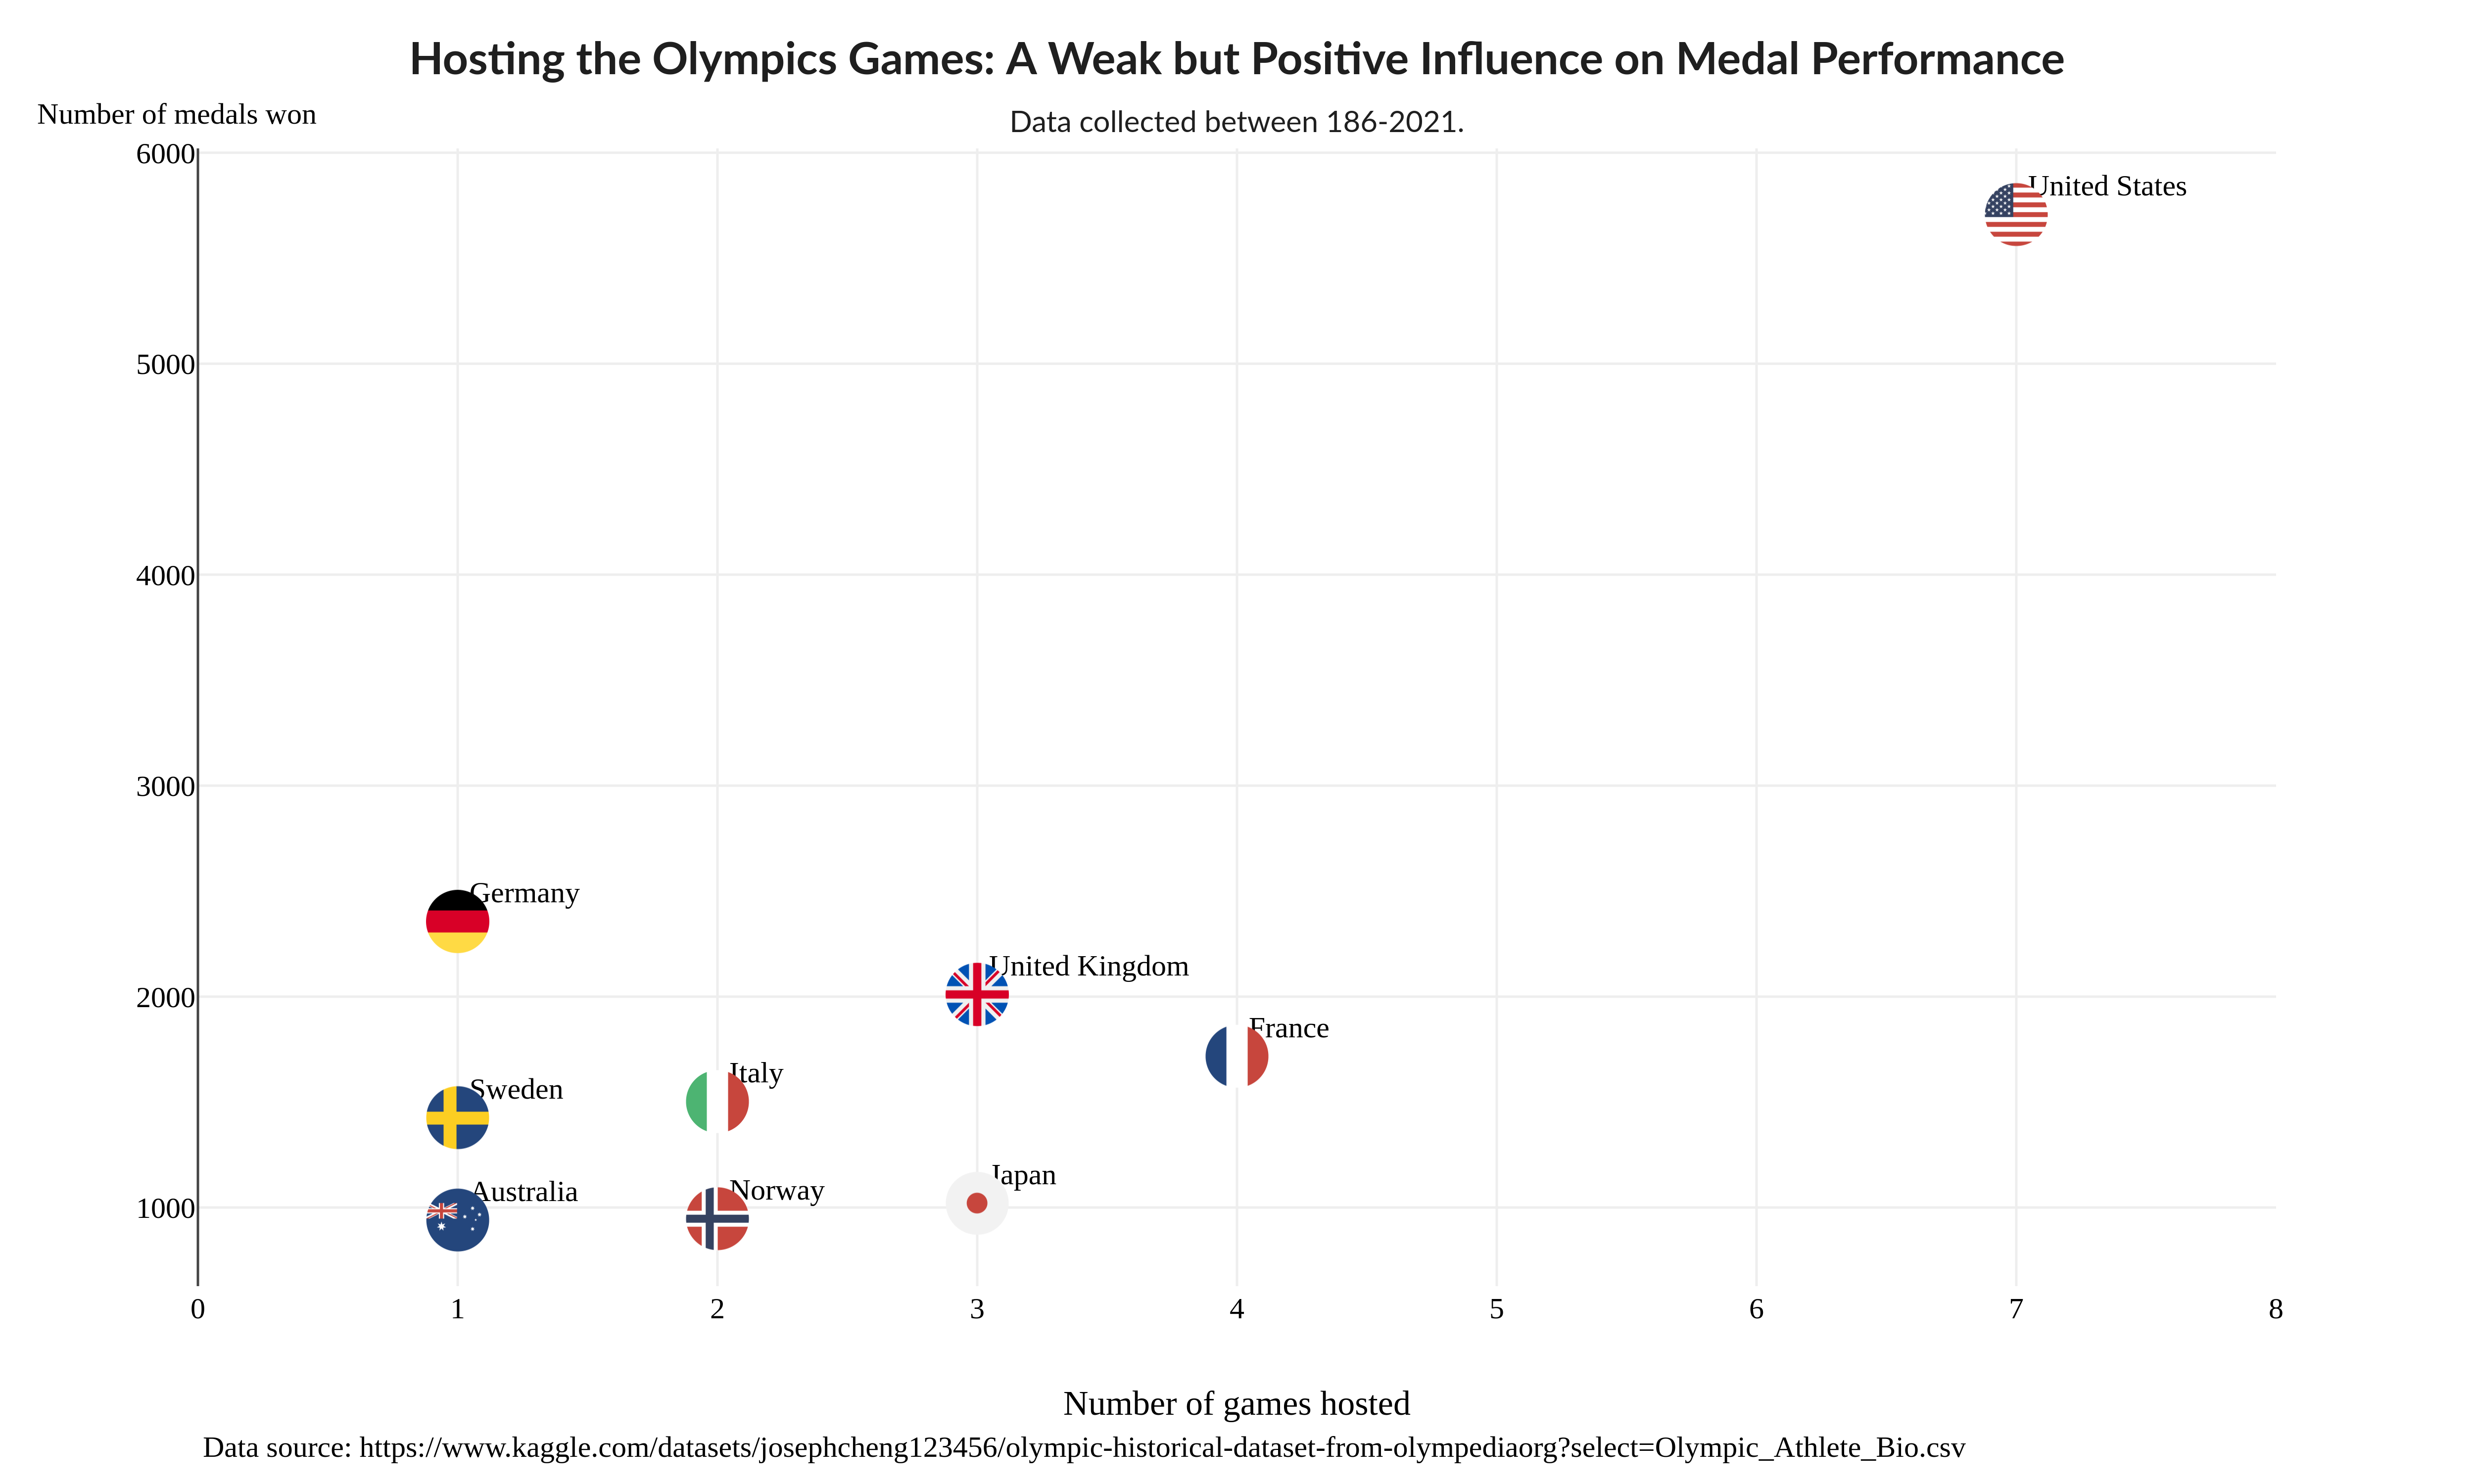

In [133]:
df[['country','Medal','Number games hosted','continent','iso_alpha2']].to_csv('data/games_hosted.csv')

In [148]:

import pycountry

ll = l.merge(pfd, how='right').dropna()
ll['Number games hosted']=ll['Number games hosted'].values.astype(int)
ll =ll.sort_values(by=['Medal'],ascending=False)
ll = ll.head(14)

iso3_to_iso2 = {c.alpha_3: c.alpha_2 for c in pycountry.countries}

df = px.data.gapminder().query("year==2007")
df["iso_alpha2"] = df["iso_alpha"].map(iso3_to_iso2)
ll = ll.rename(columns={"host country": 'country'})
df=ll.merge(df,how='right').dropna()

fig = px.scatter(
    df,y="Medal", x="GDP rank",text='country',
    hover_name="country",size="GDP rank",
    hover_data=["Medal", "Number games hosted", "GDP rank"],template=custom_template
)
fig.update_traces(marker_color="rgba(0,0,0,0)")

minDim = df[["Medal", "GDP rank"]].max().idxmax()
maxi = df[minDim].max()
for i, row in df.iterrows():
    country_iso = row["iso_alpha2"]
    fig.add_layout_image(
        dict(
            source=f"https://raw.githubusercontent.com/matahombres/CSS-Country-Flags-Rounded/master/flags/{country_iso}.png",
            xref="x",
            yref="y",
            xanchor="center",
            yanchor="middle",
            y=row["Medal"],
            x=row["GDP rank"],
            sizex = 500,
            sizey=450,
#             sizex=np.sqrt(row["GDP rank"] / df["GDP rank"].max()) * maxi * 0.02 + maxi * 0.04,
#             sizey=np.sqrt(row["GDP rank"] / df["GDP rank"].max()) * maxi * 0.02 + maxi * 0.1,
            sizing="contain",
            opacity=1,
            layer="above"
        )
    )
fig.update_traces(textposition='top right')
fig.update_xaxes(title_text='World GDP ranking.',tickmode='linear')
fig.update_yaxes(tickangle=360)
fig.update_layout(
    annotations=[
        dict(
            text="Data source: https://www.kaggle.com/datasets/josephcheng123456/olympic-historical-dataset-from-olympediaorg?select=Olympic_Athlete_Bio.csv",
            xref="paper",
            yref="paper",
            x=0,
            y=-.16,
            showarrow=False
        )
    , dict(
            text="Number of medals won",
            xref="paper",
            yref="paper",
            x=-.08,
            y=1.05,
            showarrow=False
        )]
    
)

fig.update_layout( title=format_title("Japan's Olympic Underperformance: A Deviation from the Negative Correlation between Medals and GDP Ranking.",
                                      "Data collected between 1986-2021.")
)
fig.update_layout( xaxis_range=[0, 17])
fig.update_yaxes(title_text='')
fig.show()
pio.write_image(fig, 'correlation_world.png', width=1000, height=600, scale=5)

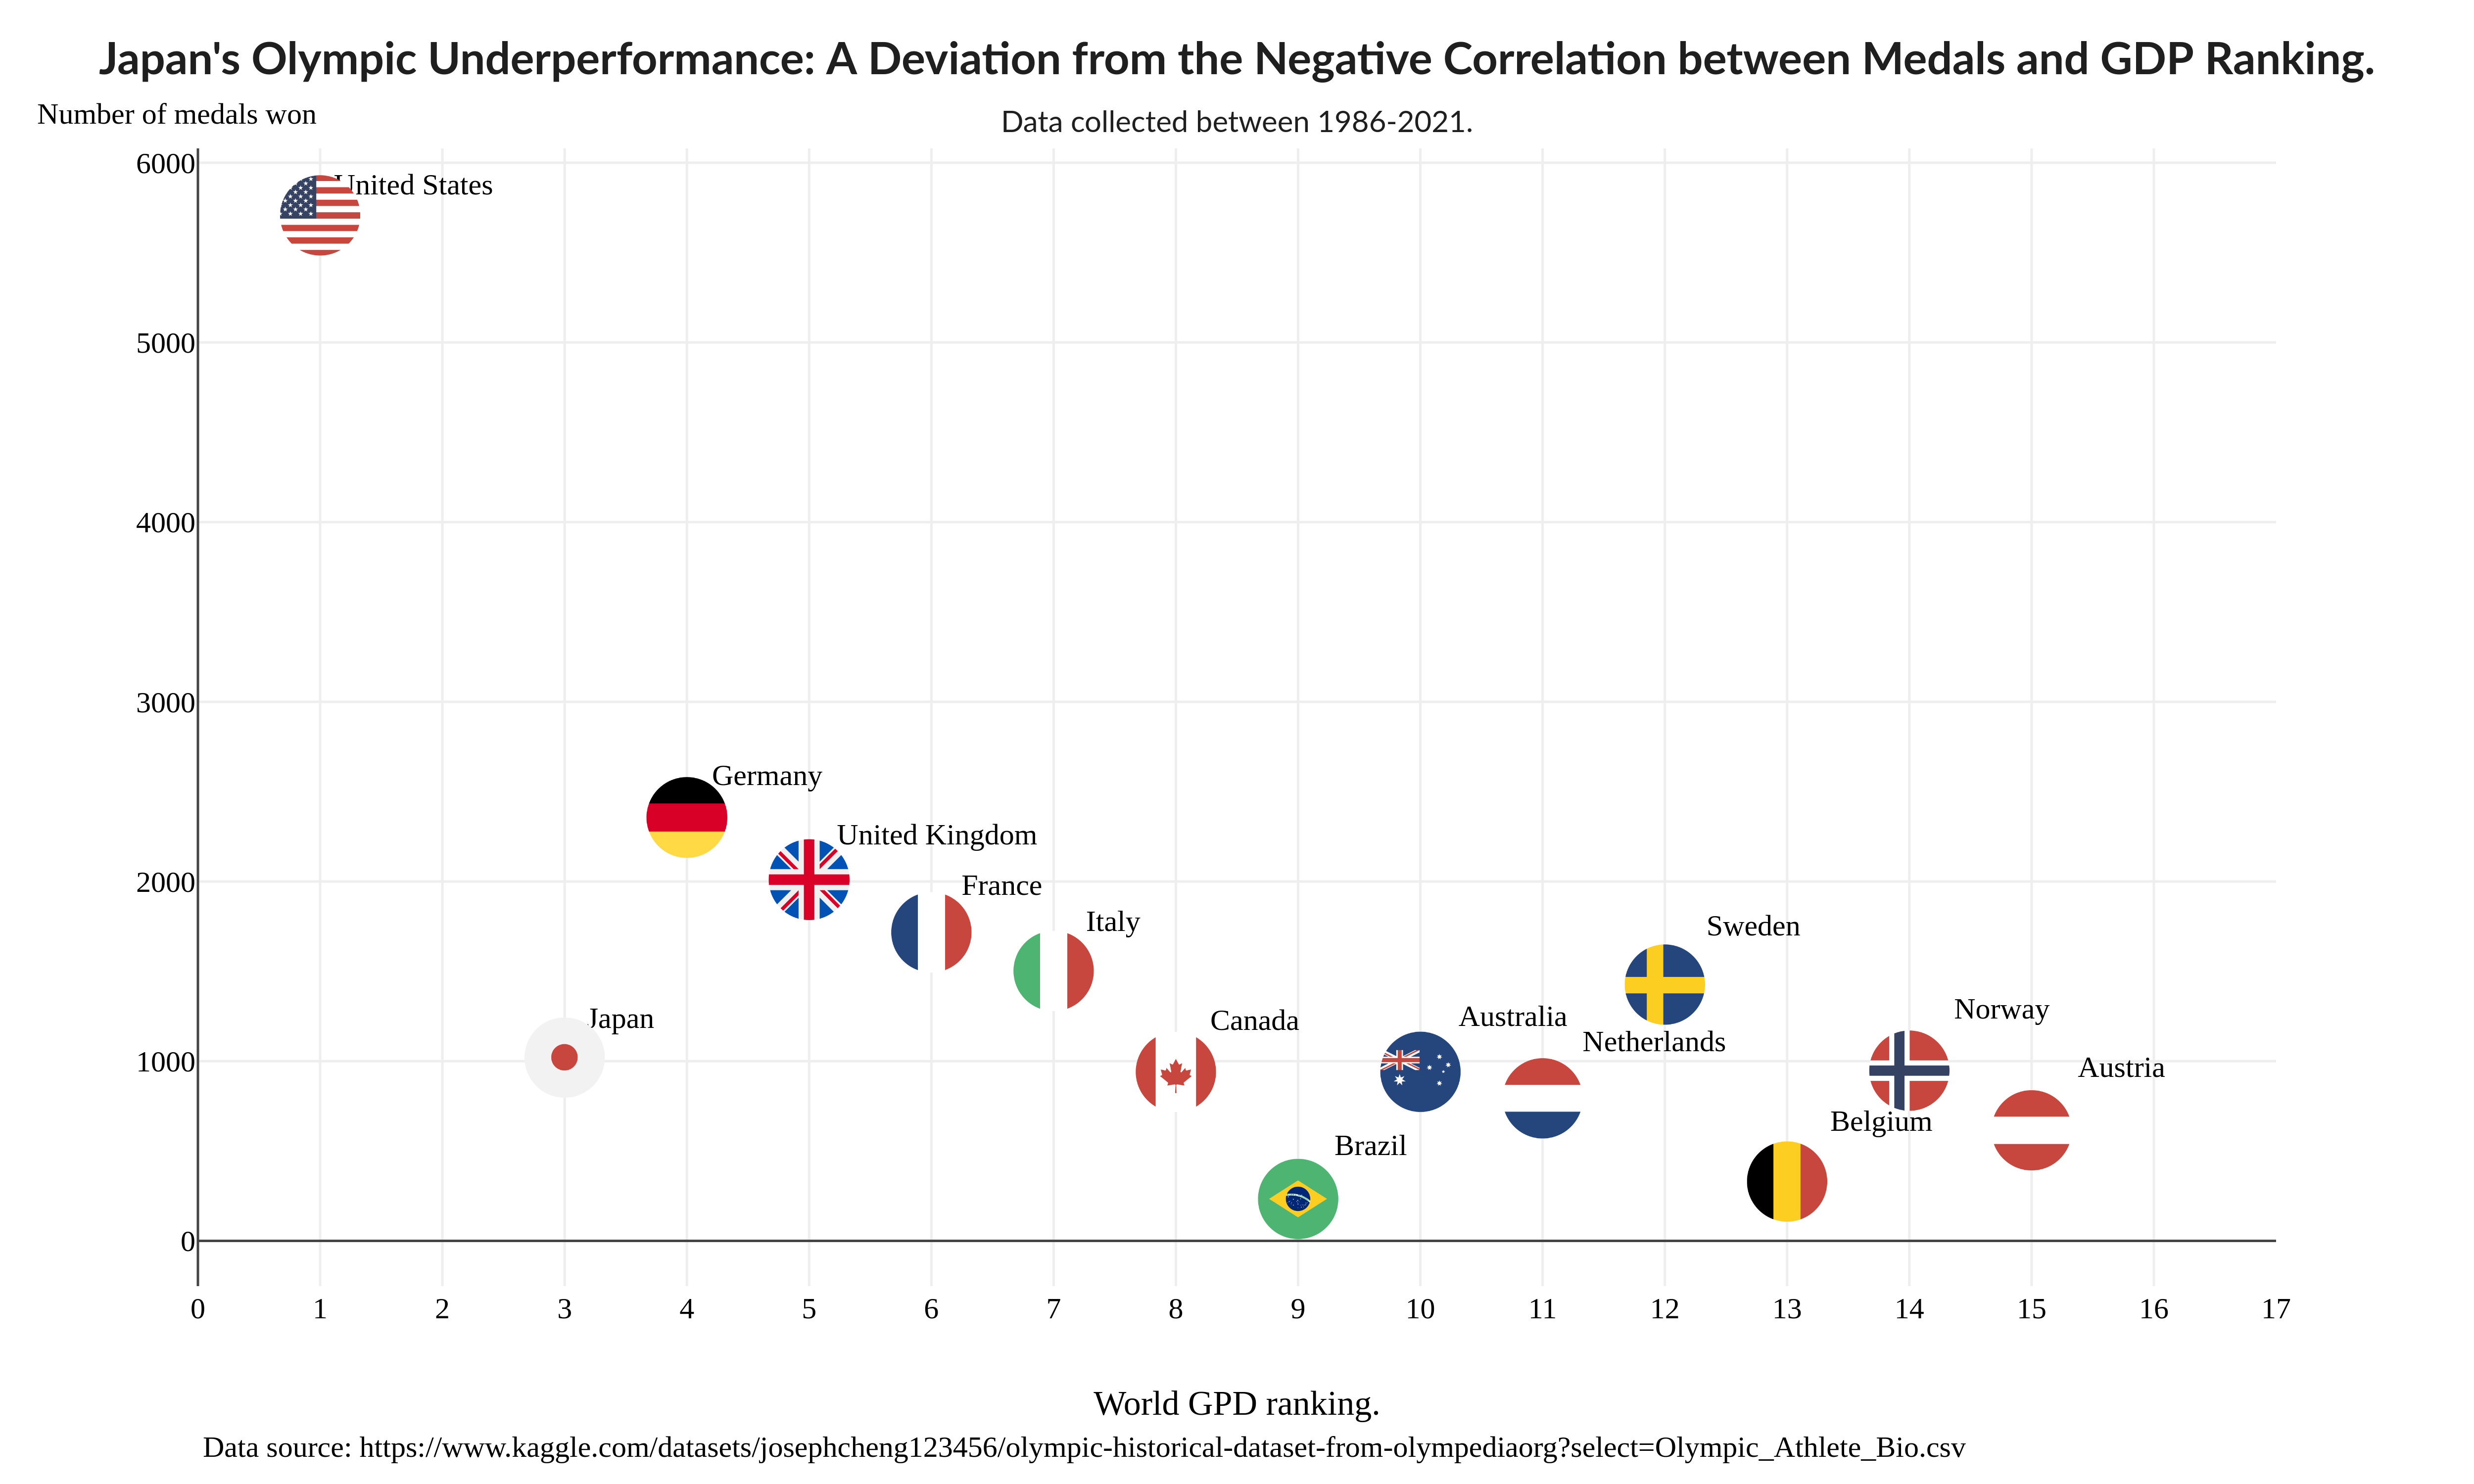

Japan's Olympic Underperformance: A Deviation from the Negative Correlation between Medals and GDP Ranking" is a title that suggests that there is generally a strong negative correlation between the number of Olympic medals won and the GDP ranking of countries. In this case, Japan is experiencing "Olympic underperformance" compared to other top wealth countries, meaning that it has won fewer Olympic medals than expected given its high GDP ranking. This deviation from the expected relationship could potentially be a result of various factors such as the country's sporting culture, funding for athletes, or other variables. The title implies that Japan's lower Olympic medal count is unusual or unexpected given the negative correlation between medals and GDP ranking, and thus warrants further investigation or explanation.



In [135]:
df[['country','Medal','Number games hosted','GDP rank','continent','iso_alpha2']].to_csv('data/top_country_rank.csv')

 For example, you might use color to highlight specific columns for storytelling. Colors can also be used if they are meaningful for the categories posted (e.g. to match company or team colors).

## c) Top African countries that have won more medail 

**If the Olympic performance of the riches countries is affected by the place where the games were organised. Therefore what about the country that can not organise the Olympic games?**

In [147]:

import pycountry

# pga =gpd[gpd['Country Name'].isin(['Cameroon','Nigeria','Algeria','South Africa','Kenya','Ethiopia','Ghana'])]
pga =gpd[gpd['Country Name'].isin(list(list_africa['Country']))]
pga = pga.sort_values(by=['2021'],ascending=False)
fda = pd.DataFrame({'country':list(pga['Country Name']), 'Africa GDP rank':[i for i in range(1,len(pga)+1)]})
tmp = newdf.groupby(['country'])['Medal number'].sum()
df6 = pd.DataFrame(data={'Medal': tmp.values}, index=tmp.index).reset_index()
df6 = df6.merge(fda, how='right').dropna()


ll= df6.sort_values(by=['Medal'],ascending=False)
ll=ll.head(15)
iso3_to_iso2 = {c.alpha_3: c.alpha_2 for c in pycountry.countries}

df = px.data.gapminder().query("year==2007")
df["iso_alpha2"] = df["iso_alpha"].map(iso3_to_iso2)
ll = ll.rename(columns={"host country": 'country'})
df=ll.merge(df,how='right').dropna()

fig = px.scatter(
    df,y="Medal", x="Africa GDP rank",text='country',
    hover_name="country",
    hover_data=["Medal", "Africa GDP rank"],template=custom_template
)
fig.update_traces(marker_color="rgba(0,0,0,0)")

minDim = df[["Medal", "Africa GDP rank"]].max().idxmax()
maxi = df[minDim].max()
for i, row in df.iterrows():
    country_iso = row["iso_alpha2"]
    fig.add_layout_image(
        dict(
            source=f"https://raw.githubusercontent.com/matahombres/CSS-Country-Flags-Rounded/master/flags/{country_iso}.png",
            xref="x",
            yref="y",
            xanchor="center",
            yanchor="middle",
            y=row["Medal"],
            x=row["Africa GDP rank"],
            sizex = 10,
            sizey=10,
#             sizex=np.sqrt(row["GDP rank"] / df["GDP rank"].max()) * maxi * 0.02 + maxi * 0.04,
#             sizey=np.sqrt(row["GDP rank"] / df["GDP rank"].max()) * maxi * 0.02 + maxi * 0.1,
            sizing="contain",
            opacity=1,
            layer="above"
        )
    )
fig.update_traces(textposition='top right')
fig.update_xaxes(title_text='Africa GDP ranking in 2021',tickmode='linear')

fig.update_layout( title=format_title("Olympic Glory vs. Economic Reality: A Comparison of African Nations.",
                                      "A strong negative correlation between Olympic medals and GDP ranking emerges for African countries ranked 10th and lower in terms of GDP.")
)

fig.update_layout( xaxis_range=[0, 32],yaxis_range=[-5, 190])
fig.update_layout(
    annotations=[
        dict(
            text="Data source: https://www.kaggle.com/datasets/josephcheng123456/olympic-historical-dataset-from-olympediaorg?select=Olympic_Athlete_Bio.csv",
            xref="paper",
            yref="paper",
            x=0,
            y=-.16,
            showarrow=False
        ),
        dict(
            text="Number of medals won",
            xref="paper",
            yref="paper",
            x=-.08,
            y=1.02,
            showarrow=False
        )
    ]
)
fig.update_yaxes(title_text='')
fig.show()



pio.write_image(fig, 'african_nation.png', width=900, height=600, scale=5)

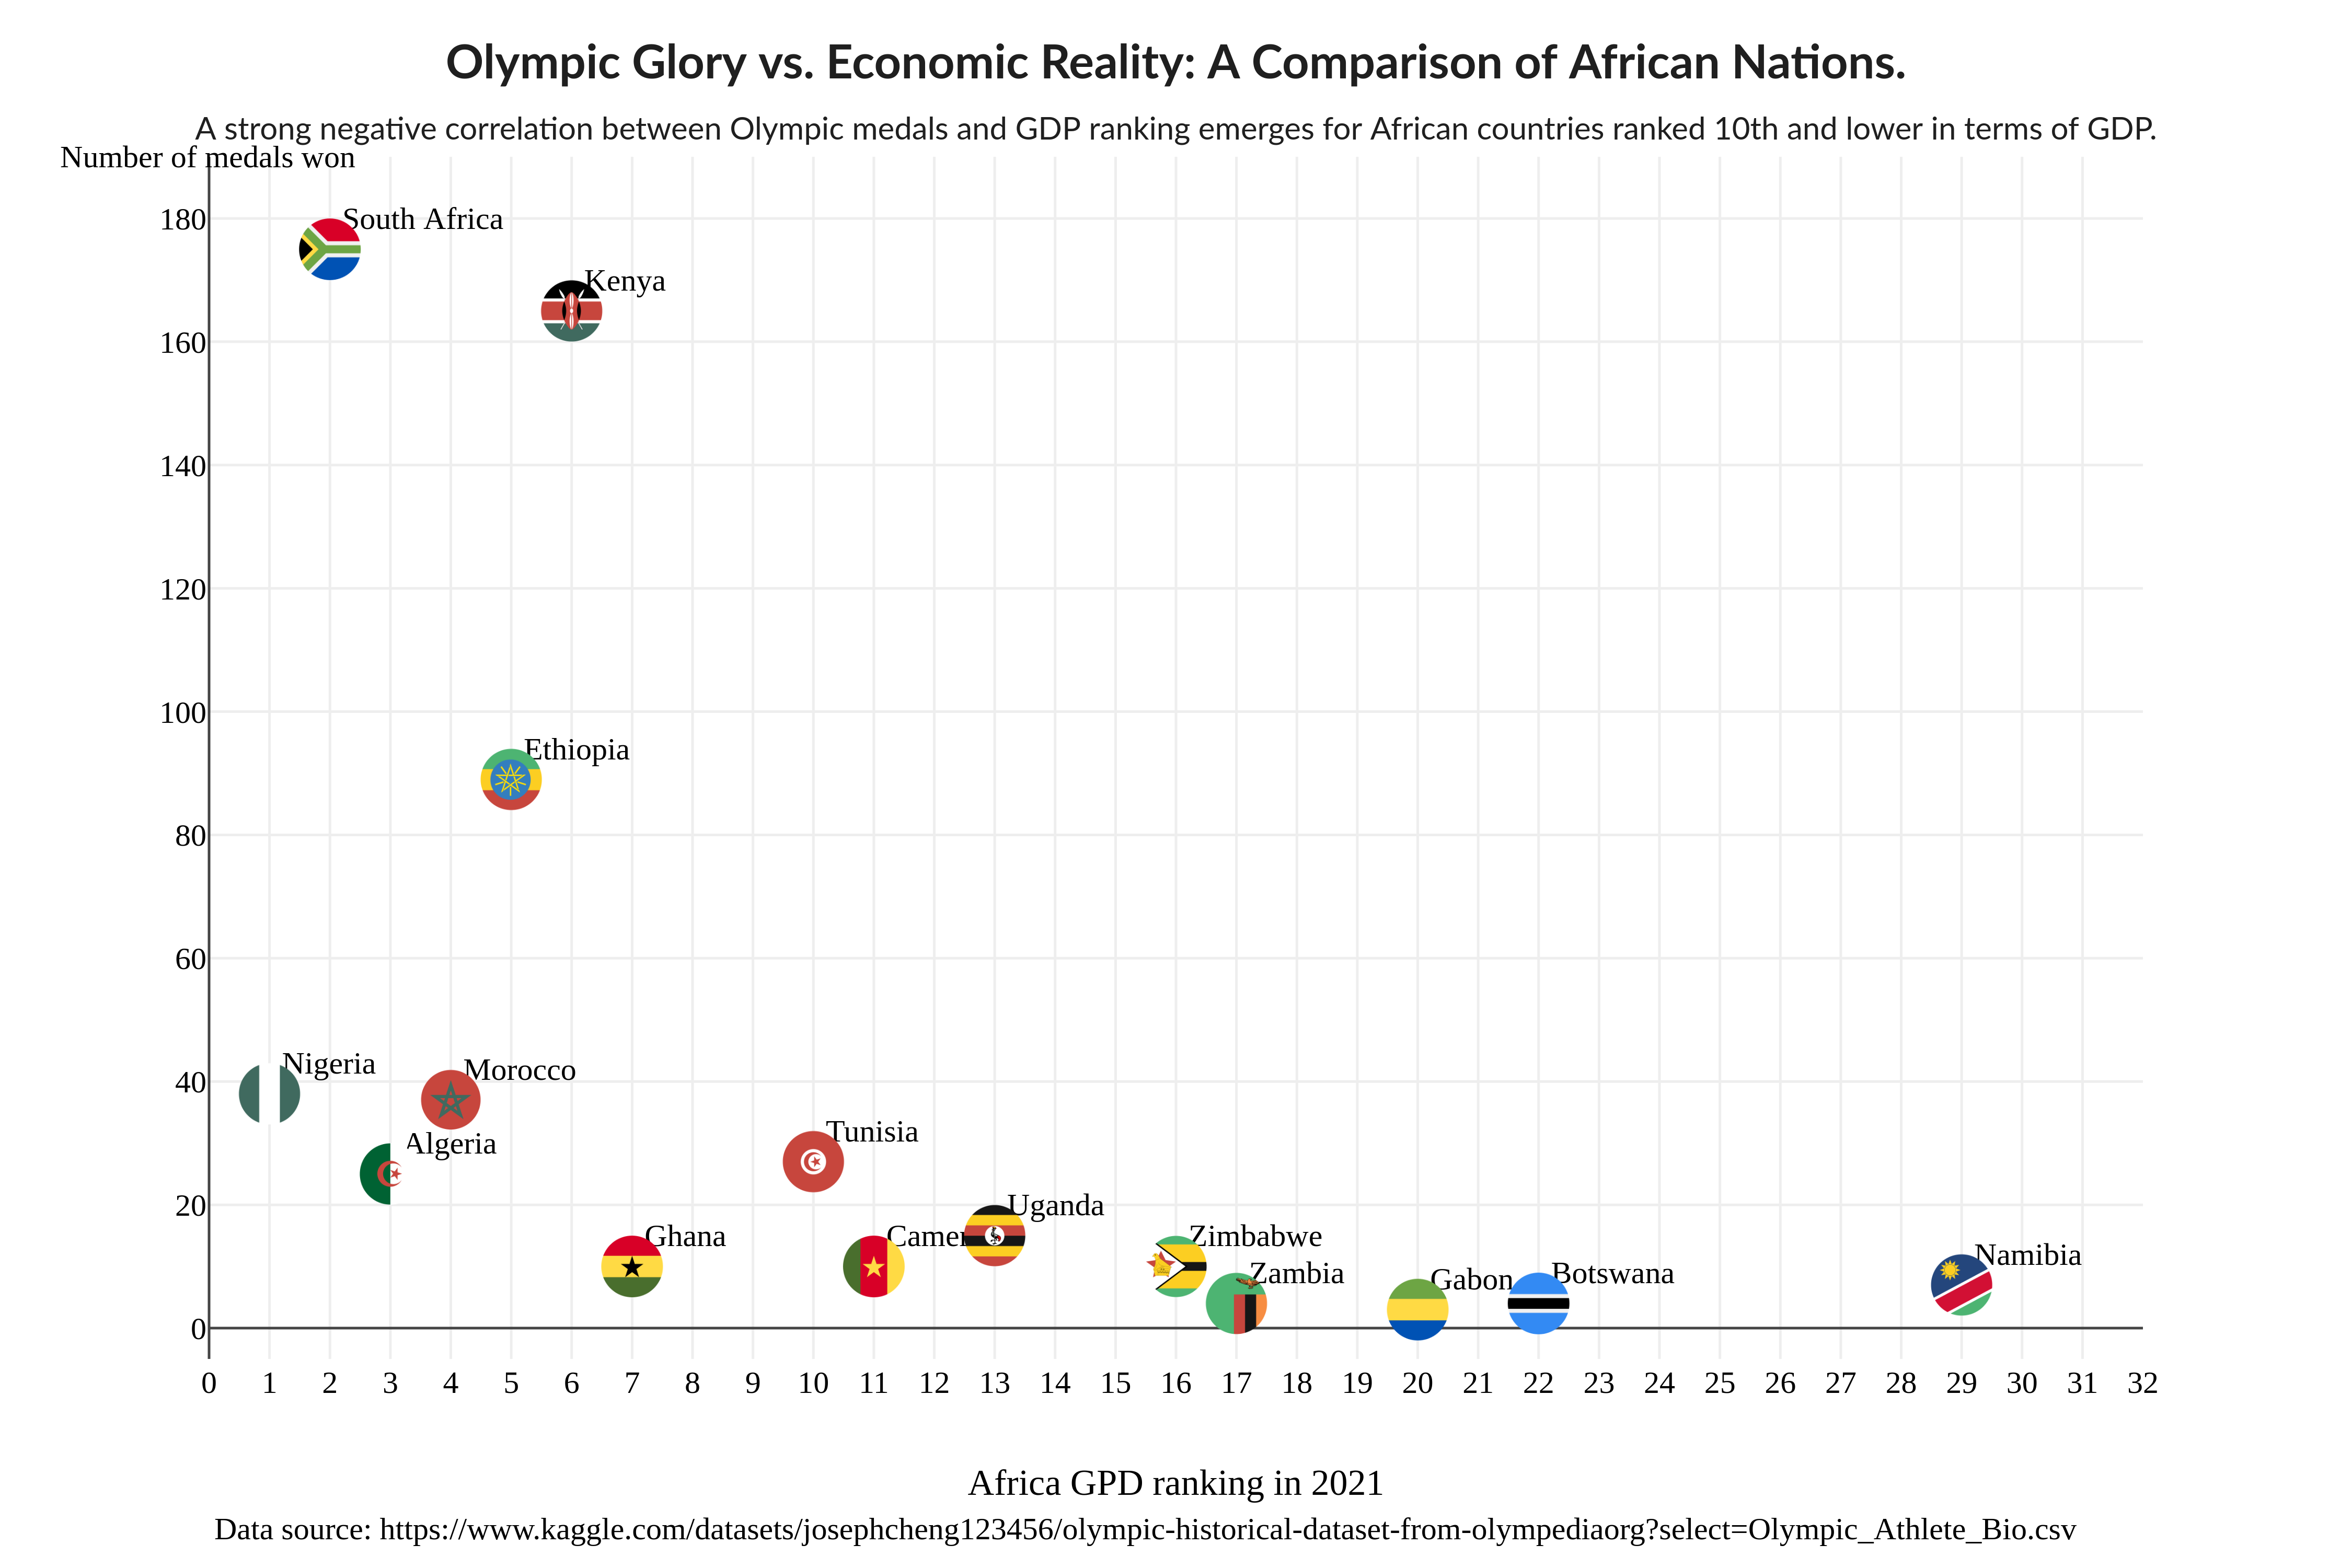

A strong correlation between Olympic medals and GDP ranking means that there is a strong relationship between the number of Olympic medals a country has won and its ranking in terms of gross domestic product (GDP). This relationship appears to be particularly strong for African countries that are ranked 10th or lower in terms of GDP.

GDP is a measure of the size of a country's economy and is often used as an indicator of a country's overall wealth and prosperity. Countries with higher GDPs tend to have more resources available to invest in sports and athlete development, which can lead to better results in international competitions like the Olympics.

On the other hand, countries with lower GDPs may have fewer resources available to invest in sports and athlete development, which can make it more difficult for them to compete at the highest levels. As a result, it is not surprising that there is a strong correlation between Olympic medals and GDP ranking for African countries ranked 10th and lower in terms of GDP.

In [137]:
df[['country','Medal','Africa GDP rank','continent','iso_alpha2']].to_csv('data/african_medals.csv')

**why kenya have won more medal in olympic games compare to nigeria?**

There are a few reasons why Kenya has won more medals in the Olympic Games compared to Nigeria. Some possible reasons include:

 1. Kenya has a strong tradition of success in athletics, especially in distance running events, which tend to be some of the most highly contested events at the Olympics.

 2. Kenya has a well-developed sports infrastructure and a national sports program that supports and trains athletes from a young age. This allows them to develop the skills and experience needed to compete at the highest levels.

 3. Kenya has a larger population than Nigeria, which means they have a greater pool of potential athletes to choose from. This increases their chances of finding talented athletes who can compete at the Olympics.

 4. Kenya has been participating in the Olympics for a longer period of time than Nigeria, which means they have had more opportunities to win medals.

Overall, Kenya's success in the Olympics is likely due to a combination of these factors, as well as the dedication and hard work of their athletes.

# Trend of the nomber of medal for the 10 top countries that have gain more medal

1. Host Country Effect- What is the probability that a participant of the host country can win a medal? Are there any type of sports that the host country has more chance of winning?

2. Economic Effect- Are there any sports that are won mostly by countries with low GDP? Does the rise/fall in economy affect the Olympic winnings of a country, and if so, in how many years is the effect seen?

3. Age Effect- Does the Relative Age Effect influence Olympic winnings? At what age is optimum age for each sport? How does the performance of each athlete improve/degrade over time?

Moreover, looking at the medals count in Olympics official site[4] and comparing with the Olympics history dataset used in this report, there are discrepancies, hence the dataset needs to be revised.

In [138]:
tmp = newdf.groupby(['year', 'country'])['Medal number'].value_counts()
df7 = pd.DataFrame(data={'Medal': tmp.values}, index=tmp.index).reset_index()


In [139]:
# tmp = newdf[['year','Host country']]
# track = df7.merge(tmp, how='right').dropna()
# df8=track[track['country'].isin(list(seasoncount['host country']))]
# df8['year'] = df8['year'].astype(int)

In [140]:
df2 = pd.DataFrame({'year':[],'country':[], 'World GDP rank':[]})
date=[gpd.columns[i] for i in range(6,len(gpd.columns)-1)]
for dat in date:
    GPD = GPD.sort_values(by=dat,ascending=False)
    GPD['Country Name'].head(12)
    data={'year':[int(dat)]*12,'country': list(GPD['Country Name'].head(12)), 'World GDP rank':[i for i in range(1,13)]}
    df2 = df2.append(  pd.DataFrame(data), ignore_index=True)
    
fg=df2[df2['country'].isin(list(seasoncount['host country']))]

<ipython-input-140-6a1a651df7b1>:7: FutureWarning:

The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.



In [141]:
df2['year'] = df2['year'].astype(int)
df2['World GDP rank'] = df2['World GDP rank'].astype(int)


In [142]:
df2

,year,country,World GDP rank
0,1962,United States,1
1,1962,United Kingdom,2
2,1962,France,3
3,1962,Japan,4
4,1962,Italy,5
...,...,...,...
715,2021,Canada,8
716,2021,Brazil,9
717,2021,Australia,10
718,2021,Netherlands,11


In [143]:
df3 = df2.merge(newdf, how='right').dropna()
df3= df3.sort_values(by=['year','Medal number'])
df3 = df3.drop_duplicates(subset=["year", "country"], keep='first')
df3['Medal number'] = df3['Medal number'].astype(int)
df3['World GDP rank'] = df3['World GDP rank'].astype(int)

In [144]:
fig = px.bar(df3, x="Medal number", y="country", color="World GDP rank",text='Medal number',pattern_shape="Host country",
  animation_frame="year", animation_group="country",range_x=[0,150],title="Number of medal won by countries that have hosted at least one Olympic game between 1986-2022.")
fig.update_traces(textposition='outside')
fig.update_layout(legend=dict(
    yanchor="bottom",
    y=0.03,
    xanchor="right",
    x=.97
))

fig.layout.updatemenus[0].buttons[0].args[1]["frame"]["duration"] = 5000
fig.update_layout({
'plot_bgcolor': 'rgba(0, 0, 0, 0)',
'paper_bgcolor': 'rgba(0, 0, 0, 0)',
})
fig.update_layout( legend_title_font_color="black",
                  font_color="black",legend = dict(font = dict(size =12 )),
    title_font_color="black",)
fig.update_yaxes(title_text='')

fig.show()

In [145]:

import pycountry
#df3 = df3.rename(columns={"host country": 'country'})
df3 = df2.merge(newdf, how='right').dropna()
df3= df3.sort_values(by=['year','Medal number'])
df3 = df3.drop_duplicates(subset=["year", "country"], keep='first')
df3['Medal number'] = df3['Medal number'].astype(int)
df3['World GDP rank'] = df3['World GDP rank'].astype(int)

iso3_to_iso2 = {c.alpha_3: c.alpha_2 for c in pycountry.countries}
df3 = df3.merge(medal[['country','country_noc']], how='right').dropna()
df3 = df3.rename(columns={'country_noc':'iso_alpha'})
df3["iso_alpha2"] = df3["iso_alpha"].map(iso3_to_iso2)



In [146]:
fig = px.scatter(
    df3,y="Medal number", x="World GDP rank",text='country',
    size="World GDP rank", animation_frame="year",
   template=custom_template, hover_name="country", hover_data=["Medal number", "World GDP rank"]
)
fig.layout.updatemenus[0].buttons[0].args[1]["frame"]["duration"] = 50
fig.update_traces(marker_color="rgba(0,0,0,0)")

# minDim = df[["Medal number", "World GDP rank"]].max().idxmax()
# maxi = df[minDim].max()
for i, row in df3.iterrows():
    country_iso = row["iso_alpha2"]
    fig.add_layout_image(
        dict(
            source=f"https://raw.githubusercontent.com/matahombres/CSS-Country-Flags-Rounded/master/flags/{country_iso}.png",
            xref="x",
            yref="y",
            xanchor="center",
            yanchor="middle",
            y=row["Medal number"],
            x=row["World GDP rank"],
            sizex = 500,
            sizey=450,
#             sizex=np.sqrt(row["GDP rank"] / df["GDP rank"].max()) * maxi * 0.02 + maxi * 0.04,
#             sizey=np.sqrt(row["GDP rank"] / df["GDP rank"].max()) * maxi * 0.02 + maxi * 0.1,
            sizing="contain",
            opacity=1,
            layer="above"
        )
    )
fig.update_traces(textposition='top right')
fig.update_xaxes(title_text='World GPD ranking.',tickmode='linear')
fig.update_yaxes(tickangle=360)
fig.update_layout(
    annotations=[
        dict(
            text="Data source: https://www.kaggle.com/datasets/josephcheng123456/olympic-historical-dataset-from-olympediaorg?select=Olympic_Athlete_Bio.csv",
            xref="paper",
            yref="paper",
            x=0,
            y=-.2,
            showarrow=False
        )
    ]
)

fig.update_layout( title=format_title("Japan's Olympic Underperformance: A Deviation from the Negative Correlation between Medals and GDP Ranking.",
                                      "Data collected between 1986-2021.")
)
fig.update_layout( xaxis_range=[0, 17])
fig.show()

fig.update_layout( legend_title_font_color="black",
                  font_color="black",legend = dict(font = dict(size =12 )),
    title_font_color="black",)
fig.update_yaxes(title_text='')

fig.show()

KeyboardInterrupt: 

In [ ]:
fig = px.scatter(
    df3,y="Medal number", x="World GDP rank",text='country',
    size="World GDP rank", animation_frame="year",
   template=custom_template, hover_name="country", hover_data=["Medal number", "World GDP rank"]
)
fig.layout.updatemenus[0].buttons[0].args[1]["frame"]["duration"] = 5000
fig.update_traces(marker_color="rgba(0,0,0,0)")

In [ ]:
df3.to_csv('data/data_medal_animation.csv')

In [ ]:
# generate images for each step in animation
frames = []
for s, fr in enumerate(fig.frames):
    # set main traces to appropriate traces within plotly frame
    fig.update(data=fr.data)
    # move slider to correct place
    fig.layout.sliders[0].update(active=s)
    # generate image of current state
    frames.append(PIL.Image.open(io.BytesIO(fig.to_image(format="png"))))
    
# create animated GIF
frames[0].save(
        "test.gif",
        save_all=True,
        append_images=frames[1:],
        optimize=True,
        duration=5000,
        loop=0,
    )

In [ ]:
df